# Evaluation of model with photos from other source

In [1]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# AlexNet Model Result
emotion_model_path = 'models/model_AlexNet_Full_Train.hdf5'
# Mini Exceptiong Model Result
# emotion_model_path = 'models/_mini_XCEPTIONweights.best.hdf5'
emotion_classifier = load_model(emotion_model_path, compile=False)
dataset_path = 'data/folder1_listing_v2.csv'
data = pd.read_csv(dataset_path)
data = data[data['expression'] <= 6]

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [2]:
y_test = []
#angry, disgust, fear, happy, sad, surprise, neutral
for i in list(data['expression']):
    if i == 0:
        y_test.append([0,0,0,0,0,0,1]);
    elif i == 1:
        y_test.append([0,0,0,1,0,0,0]);
    elif i == 2:
        y_test.append([0,0,0,0,1,0,0]);    
    elif i == 3:
        y_test.append([0,0,0,0,0,1,0]);
    elif i == 4:
        y_test.append([0,0,1,0,0,0,0]);
    elif i == 5:
        y_test.append([0,1,0,0,0,0,0]);
    else:
        y_test.append([1,0,0,0,0,0,0]);
    

In [3]:
filePaths = np.array(data['subDirectory_filePath'])
y_pred_prob = []
for filePath in filePaths:
    img = image.load_img('data/predict/' + filePath, grayscale=True, target_size=(48, 48))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x /= 255
    y_result = emotion_classifier.predict(x)
    y_pred_prob.append(y_result)
y_pred = []
for i in range(len(y_pred_prob)):
    y_result = [0] * 7
    y_result[np.argmax(y_pred_prob[i])] = 1
    y_pred.append(y_result)

C:\Anaconda3\envs\python3.6\lib\site-packages\keras_preprocessing\image\utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [4]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
y_test = np.array(y_test)
y_pred = np.array(y_pred)
evaluation_result = precision_recall_fscore_support(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of model is: ', 
          accuracy, '\n',
          'The precision, recall, F-score and support are:', '\n',
          'angry, disgust, fear, happy, sad, surprise, neutral', '\n',
          evaluation_result[0], '\n',
          evaluation_result[1], '\n',
          evaluation_result[2], '\n',
          evaluation_result[3]
         )

Accuracy of model is:  0.6902654867256637 
 The precision, recall, F-score and support are: 
 angry, disgust, fear, happy, sad, surprise, neutral 
 [0.14705882 0.         0.2        0.94153846 0.22857143 0.66666667
 0.48837209] 
 [0.52631579 0.         0.2        0.83606557 0.57142857 0.16666667
 0.63636364] 
 [0.22988506 0.         0.2        0.88567294 0.32653061 0.26666667
 0.55263158] 
 [ 19  50   5 366  14  12  99]


C:\Anaconda3\envs\python3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[ 10   0   0   2   5   0   2]
 [ 23   0   0   8   7   0  12]
 [  3   0   1   0   0   0   1]
 [ 10   0   2 306   6   0  42]
 [  3   0   0   0   8   0   3]
 [  0   0   1   1   2   2   6]
 [ 19   0   1   8   7   1  63]]


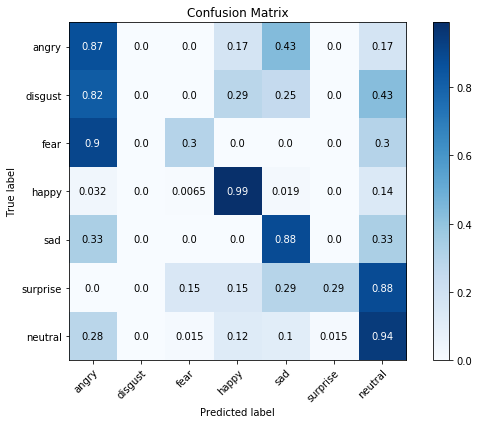

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

print(cm)

cm = normalize(cm, norm='l2', axis=1)

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'], yticklabels=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'],
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fmt = '.2'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

plt.show()